# FutureFit
#### Machine Learning based approach to predict the **placement possiblities for undergraduate students**

*Proposed models* :
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Naive Bayes
5. K Nearest Neighbours


### Importing Necessary Libraries and Methods

In [1]:
#importing the necessary tools for analysis and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#importing the ML models and aliasing them

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN

#importing necessary tools for performance testing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(model_name,confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    plt.title(f"Confusion Matrix of {model_name}")
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [3]:
def visual_classification_report(model_name, truth, prediction):
  print(f"Classification report for {model_name}")
  print(classification_report(truth, prediction))
  report = classification_report(truth, prediction, output_dict=True)

  report_df = pd.DataFrame(report).transpose()

  # Plot precision scores
  plt.figure(figsize=(10, 6))
  sns.barplot(x=report_df.index, y=report_df['precision'], palette='viridis')
  plt.title(f'Precision Scores of {model_name}')
  plt.xlabel('Class')
  plt.ylabel('Precision')
  plt.xticks(rotation=45)
  plt.show()

  # Plot recall scores
  plt.figure(figsize=(10, 6))
  sns.barplot(x=report_df.index, y=report_df['recall'], palette='ocean')
  plt.title(f'Recall Scores {model_name}')
  plt.xlabel('Class')
  plt.ylabel('Recall')
  plt.xticks(rotation=45)
  plt.show()

  # Plot F1 scores
  plt.figure(figsize=(10, 6))
  sns.barplot(x=report_df.index, y=report_df['f1-score'], palette='twilight')
  plt.title(f'F1 Scores {model_name}')
  plt.xlabel('Class')
  plt.ylabel('F1 Score')
  plt.xticks(rotation=45)
  plt.show()

### Loading the Dataset from Google Drive

In [4]:
file_link = 'https://drive.google.com/file/d/15Jhdfr16Yb-qiO81-LheJgzsTf-NhgRk/view?usp=drive_link' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]
print(id)

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(new_link)

# let's look at the first few instances
data.head()

15Jhdfr16Yb-qiO81-LheJgzsTf-NhgRk


,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [5]:
data.tail()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
219995,Ashley Conner,36698,453,8.77,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,5,28.4,24,Electrical Engineering,24.81
219996,Samuel Kemp,85027,375,6.15,No,No,Yes,Yes,No,No,No,Yes,No,No,3,27.6,18,Electrical Engineering,11.00
219997,Alexander Payne,92497,52,2.05,No,No,No,No,Yes,No,No,No,Yes,Yes,4,27.2,25,Computer Science,3.82
219998,Sean Bauer,35235,404,5.63,No,No,Yes,Yes,No,Yes,No,No,No,Yes,0,25.0,21,Mechanical Engineering,47.80
219999,Brianna Wilcox,94796,134,7.49,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,2,21.7,22,Electrical Engineering,23.08


### EDA(Exploraatory Data Analysis)

In [6]:
data.shape
print("Number of rows : ", data.shape[0])
print("Number of columns : ", data.shape[1])

Number of rows :  220000
Number of columns :  19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name of Student               220000 non-null  object 
 1   Roll No.                      220000 non-null  int64  
 2   No. of DSA questions          220000 non-null  int64  
 3   CGPA                          220000 non-null  float64
 4   Knows ML                      215581 non-null  object 
 5   Knows DSA                     220000 non-null  object 
 6   Knows Python                  215573 non-null  object 
 7   Knows JavaScript              215718 non-null  object 
 8   Knows HTML                    215671 non-null  object 
 9   Knows CSS                     215678 non-null  object 
 10  Knows Cricket                 220000 non-null  object 
 11  Knows Dance                   220000 non-null  object 
 12  Participated in College Fest  220000 non-nul

In [8]:
data.describe(include='all')

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
count,220000,220000.000000,220000.000000,220000.000000,215581,220000,215573,215718,215671,215678,220000,220000,220000,220000,220000.000000,220000.000000,220000.000000,220000,220000.000000
unique,120026,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,4,NaN
top,Michael Smith,NaN,NaN,NaN,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,NaN,NaN,NaN,Electrical Engineering,NaN
freq,103,NaN,NaN,NaN,107953,110096,107815,107968,107836,107850,110242,110182,110216,110153,NaN,NaN,NaN,55438,NaN
mean,NaN,54857.740568,250.099414,5.005776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.497368,24.004006,21.497373,NaN,20.295666
std,NaN,25983.468755,144.545550,2.888164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.707581,3.467504,2.290835,NaN,15.597126
min,NaN,10000.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,18.000000,18.000000,NaN,2.500000
25%,NaN,32394.000000,125.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,21.000000,19.000000,NaN,6.950000
50%,NaN,54695.000000,250.000000,5.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,24.000000,21.000000,NaN,12.530000
75%,NaN,77376.000000,375.000000,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,27.000000,23.000000,NaN,32.830000


In [9]:
data.nunique()

Name of Student                 120026
Roll No.                         80341
No. of DSA questions               501
CGPA                              1001
Knows ML                             2
Knows DSA                            2
Knows Python                         2
Knows JavaScript                     2
Knows HTML                           2
Knows CSS                            2
Knows Cricket                        2
Knows Dance                          2
Participated in College Fest         2
Was in Coding Club                   2
No. of backlogs                      6
Interview Room Temperature         121
Age of Candidate                     8
Branch of Engineering                4
Placement Package                 5550
dtype: int64

In [10]:
data.isnull().sum()

Name of Student                    0
Roll No.                           0
No. of DSA questions               0
CGPA                               0
Knows ML                        4419
Knows DSA                          0
Knows Python                    4427
Knows JavaScript                4282
Knows HTML                      4329
Knows CSS                       4322
Knows Cricket                      0
Knows Dance                        0
Participated in College Fest       0
Was in Coding Club                 0
No. of backlogs                    0
Interview Room Temperature         0
Age of Candidate                   0
Branch of Engineering              0
Placement Package                  0
dtype: int64

In [11]:
data.columns

Index(['Name of Student', 'Roll No.', 'No. of DSA questions', 'CGPA',
       'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club', 'No. of backlogs',
       'Interview Room Temperature', 'Age of Candidate',
       'Branch of Engineering', 'Placement Package'],
      dtype='object')

In [12]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Name of Student', 'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript', 'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance', 'Participated in College Fest', 'Was in Coding Club', 'Branch of Engineering']
Numerical Variables:
['Roll No.', 'No. of DSA questions', 'CGPA', 'No. of backlogs', 'Interview Room Temperature', 'Age of Candidate', 'Placement Package']


In [13]:
#variable visualization
def varvis(varname):
  print(data.value_counts(varname))

  plt.figure(figsize=(5, 3))
  data[varname].value_counts().plot(kind='bar', color=['green', 'red'])
  plt.title(f'Distribution of {varname}')
  plt.xlabel(varname)
  plt.ylabel(f'Count of {varname}')
  plt.xticks(rotation = 0)
  plt.show()

Knows ML
No     107953
Yes    107628
Name: count, dtype: int64


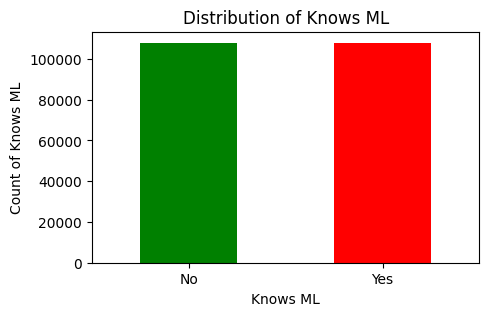

In [14]:
varvis('Knows ML')

Knows DSA
Yes    110096
No     109904
Name: count, dtype: int64


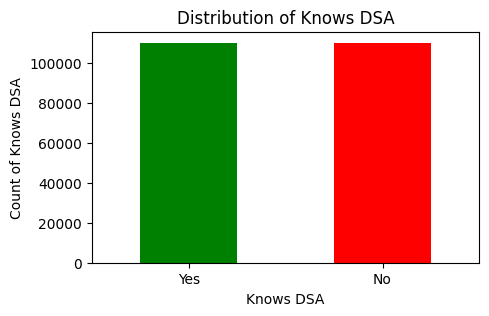

In [15]:
varvis('Knows DSA')

Knows Python
Yes    107815
No     107758
Name: count, dtype: int64


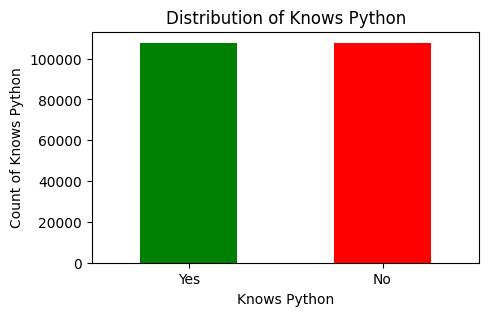

In [16]:
varvis('Knows Python')

Knows JavaScript
No     107968
Yes    107750
Name: count, dtype: int64


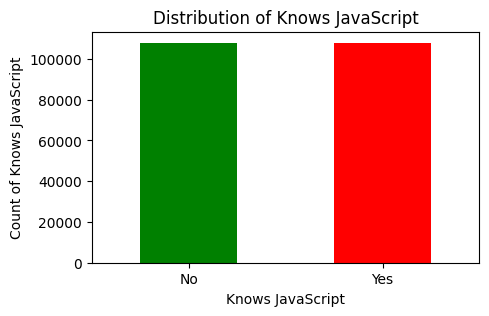

In [17]:
varvis('Knows JavaScript')

Knows CSS
Yes    107850
No     107828
Name: count, dtype: int64


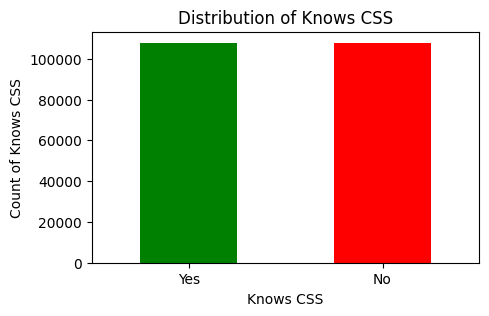

In [18]:
varvis('Knows CSS')

Was in Coding Club
No     110153
Yes    109847
Name: count, dtype: int64


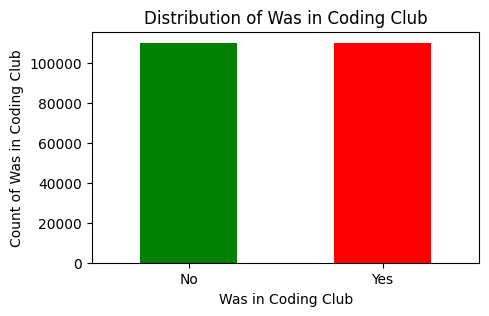

In [19]:
varvis('Was in Coding Club')

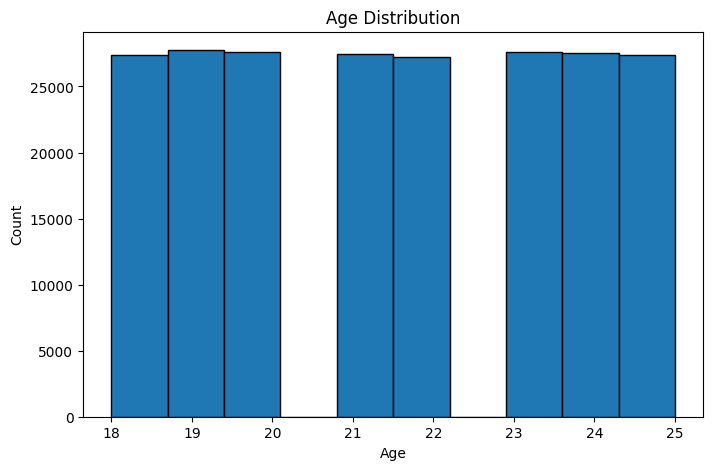

In [20]:
# Visualize the distribution of 'Age' variable
plt.figure(figsize=(8, 5))
plt.hist(data['Age of Candidate'].dropna(), edgecolor='black') # dropna eliminates the null/missing values
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
#correlation matrix banano lagbe eikhane

### Data PreProcessing

In [22]:
#dropping useless features
data = data.drop(['Name of Student', 'Roll No.','Knows Cricket', 'Knows Dance','Participated in College Fest','Interview Room Temperature'], axis = 1)
data.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,Yes,2,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,No,Yes,1,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,Yes,No,No,1,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,Yes,No,No,4,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,No,1,21,Electrical Engineering,46.30


In [23]:
data = data.drop_duplicates()
data

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,Yes,2,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,No,Yes,1,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,Yes,No,No,1,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,Yes,No,No,4,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,No,1,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219966,3,3.44,Yes,Yes,Yes,Yes,NaN,No,No,0,21,Mechanical Engineering,10.78
219974,19,3.78,No,Yes,No,Yes,No,Yes,No,1,23,Electrical Engineering,5.05
219984,484,1.71,Yes,Yes,No,Yes,Yes,No,No,2,24,Electrical Engineering,12.95
219985,310,4.79,Yes,No,Yes,Yes,Yes,Yes,No,2,21,Mechanical Engineering,8.84


In [24]:
data.shape

(203426, 13)

In [25]:
data.isnull().sum()

No. of DSA questions        0
CGPA                        0
Knows ML                 4404
Knows DSA                   0
Knows Python             4422
Knows JavaScript         4273
Knows HTML               4326
Knows CSS                4315
Was in Coding Club          0
No. of backlogs             0
Age of Candidate            0
Branch of Engineering       0
Placement Package           0
dtype: int64

In [26]:
data.dropna(subset=['Knows ML','Knows Python','Knows JavaScript','Knows HTML','Knows CSS'], inplace=True)
data

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,Yes,2,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,No,Yes,1,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,Yes,No,No,1,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,Yes,No,No,4,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,No,1,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219962,258,9.84,Yes,No,Yes,Yes,Yes,No,No,4,23,Electrical Engineering,26.13
219974,19,3.78,No,Yes,No,Yes,No,Yes,No,1,23,Electrical Engineering,5.05
219984,484,1.71,Yes,Yes,No,Yes,Yes,No,No,2,24,Electrical Engineering,12.95
219985,310,4.79,Yes,No,Yes,Yes,Yes,Yes,No,2,21,Mechanical Engineering,8.84


In [27]:
data.shape

(182522, 13)

In [28]:
data.isnull().sum()

No. of DSA questions     0
CGPA                     0
Knows ML                 0
Knows DSA                0
Knows Python             0
Knows JavaScript         0
Knows HTML               0
Knows CSS                0
Was in Coding Club       0
No. of backlogs          0
Age of Candidate         0
Branch of Engineering    0
Placement Package        0
dtype: int64

In [29]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript', 'Knows HTML', 'Knows CSS', 'Was in Coding Club', 'Branch of Engineering']
Numerical Variables:
['No. of DSA questions', 'CGPA', 'No. of backlogs', 'Age of Candidate', 'Placement Package']


In [30]:
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [31]:
data.shape

(182522, 13)

In [32]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       No. of DSA questions      CGPA  Knows ML  Knows DSA  \
No. of DSA questions               1.000000 -0.000178 -0.005178   0.001769   
CGPA                              -0.000178  1.000000  0.001482  -0.001117   
Knows ML                          -0.005178  0.001482  1.000000  -0.004437   
Knows DSA                          0.001769 -0.001117 -0.004437   1.000000   
Knows Python                       0.003704 -0.000917 -0.000033  -0.001129   
Knows JavaScript                   0.001832  0.002561 -0.002773  -0.000052   
Knows HTML                         0.000596 -0.001634 -0.000044  -0.003199   
Knows CSS                         -0.001866  0.002778  0.001984  -0.003518   
Was in Coding Club                -0.000825  0.001306  0.003900  -0.000085   
No. of backlogs                   -0.002903  0.002000  0.000062   0.003049   
Age of Candidate                  -0.000218  0.000979 -0.001873  -0.002144   
Branch of Engineering              0.001711 

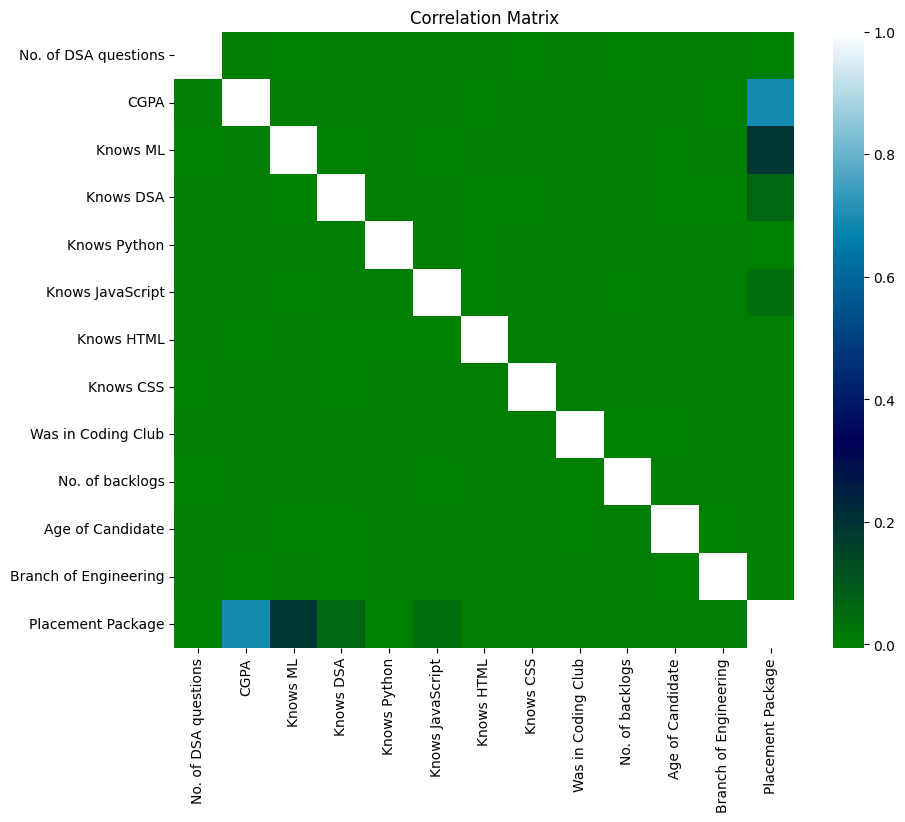

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='ocean', fmt=".2f") #ocean  #most clear : tab10
plt.title('Correlation Matrix')
plt.show()
#the heatmap is very flat because all the values are symmetrical

## Implementing Models

In [59]:
# Split the data into 70-30 train-test split

X = data.drop(['Placement Package'], axis=1)
y = data['Placement Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127765, 12)
X_test shape: (54757, 12)
y_train shape: (127765,)
y_test shape: (54757,)


In [36]:
# Define thresholds for the categories
threshold_poor = 10.0  # below 10 LPA
threshold_decent = 20.0  # 10 LPA to 20 LPA

# Binarize the target variable into three categories
y_train_categorical = np.where(y_train <= threshold_poor, 'Poor',
                                np.where(y_train <= threshold_decent, 'Decent', 'Great'))
y_test_categorical = np.where(y_test <= threshold_poor, 'Poor',
                               np.where(y_test <= threshold_decent, 'Decent', 'Great'))

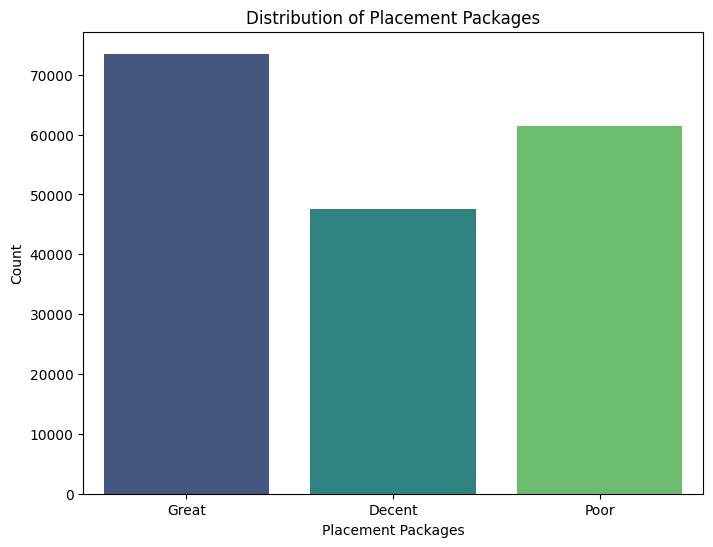

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
package_value_categorical = np.where(data['Placement Package'] <= threshold_poor, 'Poor', np.where(data['Placement Package'] <= threshold_decent, 'Decent', 'Great'))

# Convert numpy array to pandas Series
package_value_series = pd.Series(package_value_categorical)

# Plot the count of each category
plt.figure(figsize=(8, 6))
sns.countplot(x=package_value_series, palette='viridis')
plt.title('Distribution of Placement Packages')
plt.xlabel('Placement Packages')
plt.ylabel('Count')
plt.show()

#### Decision Tree

In [38]:
# Train the decision tree classifier
decision_tree_model = DT(criterion='gini', max_depth=10, random_state=42)
decision_tree_model.fit(X_train, y_train_categorical)

# Predictions on the test set
y_pred_dt_categorical = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_categorical, y_pred_dt_categorical)

print(f"Decision Tree Classifier Accuracy: {accuracy_dt*100} %")

Decision Tree Classifier Accuracy: 84.7069781032562 %


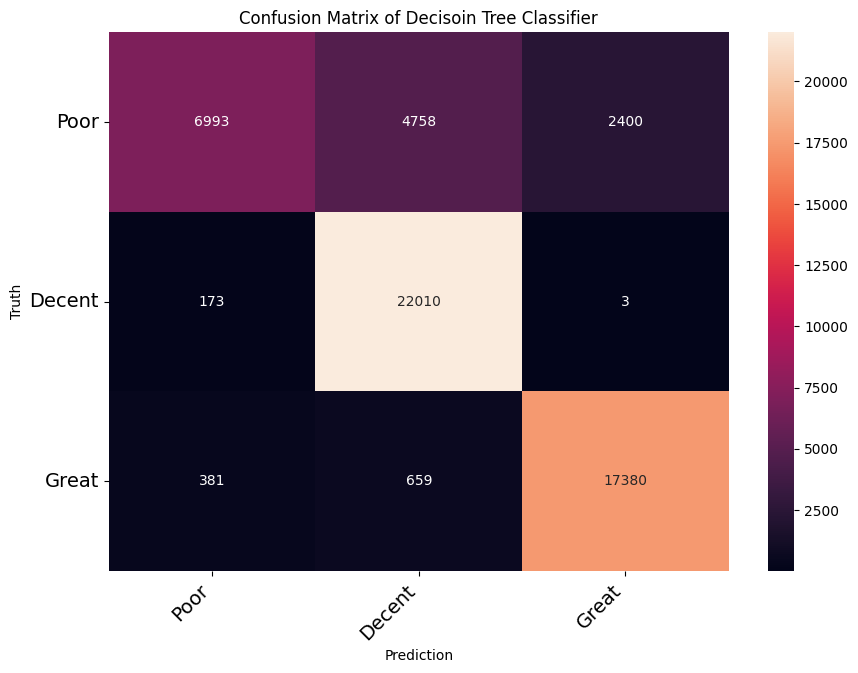

In [39]:
#confusion matrix for decison tree classifier
cm = confusion_matrix(y_test_categorical, y_pred_dt_categorical)
print_confusion_matrix("Decisoin Tree Classifier",cm,["Poor", "Decent", "Great"])

#### Random Forest

In [40]:
# Implementing Random Forest Classifier
random_forest_model = RF(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=37)
random_forest_model.fit(X_train, y_train_categorical)

# Predictions on the test set
y_pred_rf_categorical = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_categorical, y_pred_rf_categorical)

print(f"Random Forest Classifier Accuracy: {accuracy_rf*100} %")

Random Forest Classifier Accuracy: 85.17997698924339 %


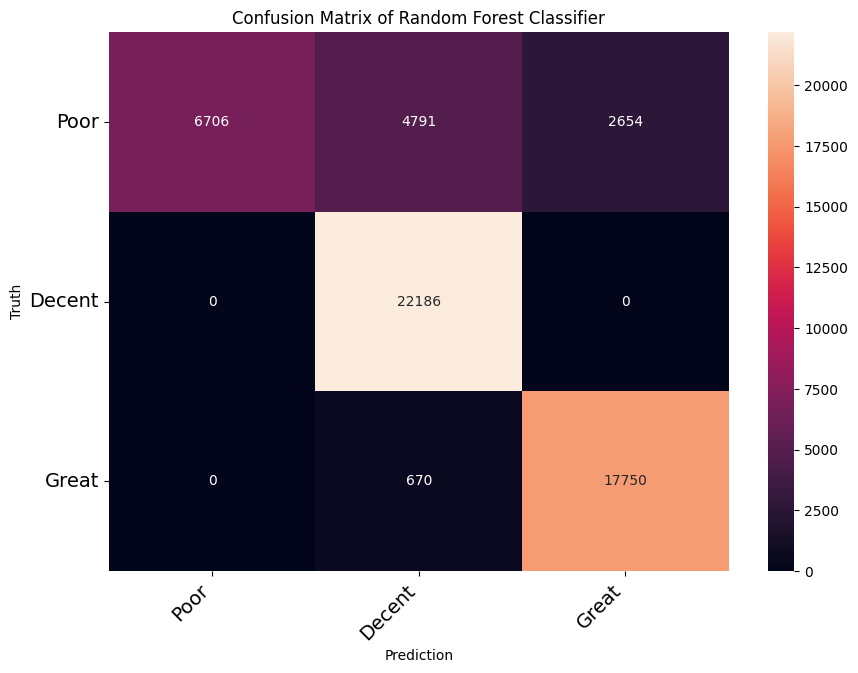

In [41]:
#confusion matrix for random forest classifier
cm = confusion_matrix(y_test_categorical, y_pred_rf_categorical)
print_confusion_matrix("Random Forest Classifier",cm,["Poor", "Decent", "Great"])

#### Logistic Regression

In [42]:
# Create Logistic Regression classifier
logistic_regression_model = LGR(max_iter=1000, random_state=42)

# Train the Logistic Regression classifier
logistic_regression_model.fit(X_train, y_train_categorical)

# Predictions on the test set
y_pred_lgr_categorical = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy_lgr = accuracy_score(y_test_categorical, y_pred_lgr_categorical)

print(f"Logistic Regression Classifier Accuracy: {accuracy_lgr*100} %")


Logistic Regression Classifier Accuracy: 79.16796026078858 %


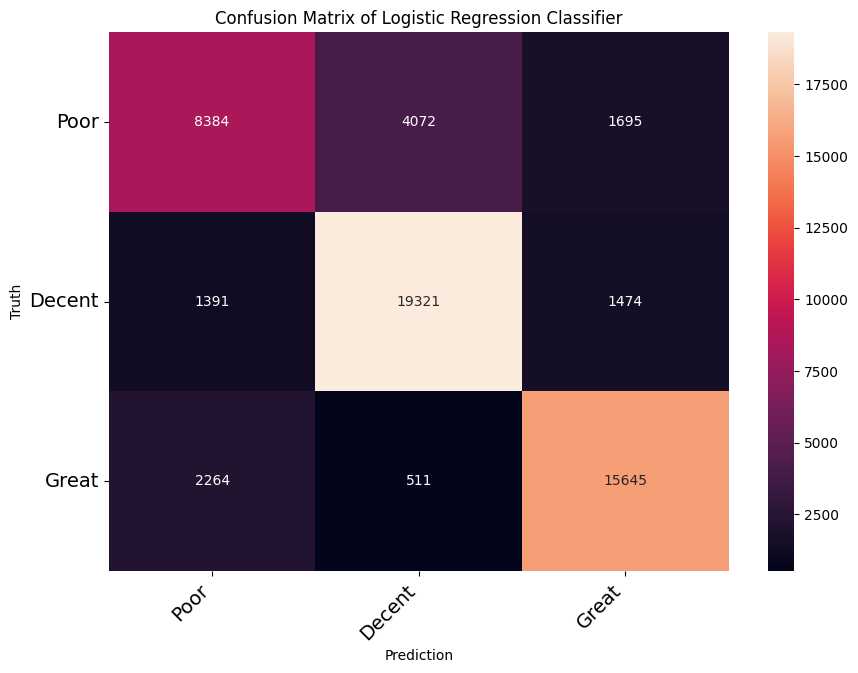

In [43]:
#confusion matrix for logistic regression classifier
cm = confusion_matrix(y_test_categorical, y_pred_lgr_categorical)
print_confusion_matrix("Logistic Regression Classifier",cm,["Poor", "Decent", "Great"])

#### Naive Bayes

In [44]:
# Create Naive Bayes classifier
naive_bayes_model = NB()

# Train the Naive Bayes classifier
naive_bayes_model.fit(X_train, y_train_categorical)

# Predictions on the test set
y_pred_nb_categorical = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_categorical, y_pred_nb_categorical)

print(f"Naive Bayes Classifier Accuracy: {accuracy_nb*100} %")

Naive Bayes Classifier Accuracy: 78.40458754131892 %


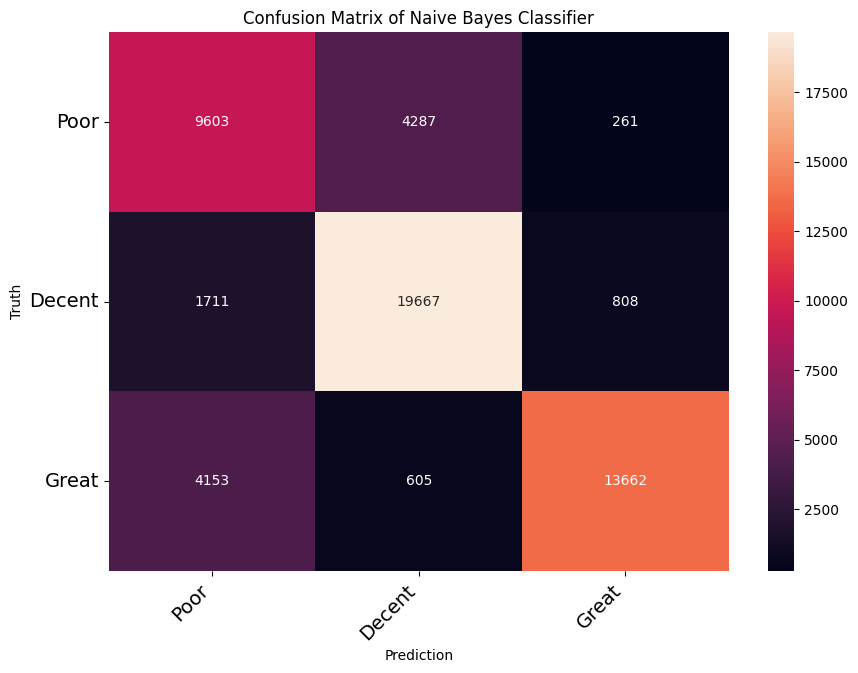

In [45]:
#confusion matrix for naive bayes classifier
cm = confusion_matrix(y_test_categorical, y_pred_nb_categorical)
print_confusion_matrix("Naive Bayes Classifier",cm,["Poor", "Decent", "Great"])

#### K Nearest Neighbours

In [46]:
# Create KNN classifier
knn_model = KNN(n_neighbors=5)

# Train the KNN classifier
knn_model.fit(X_train, y_train_categorical)

# Predictions on the test set
y_pred_knn_categorical = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_categorical, y_pred_knn_categorical)

print(f"K-Nearest Neighbours Classifier Accuracy: {accuracy_knn*100} %")

K-Nearest Neighbours Classifier Accuracy: 71.92139817740197 %


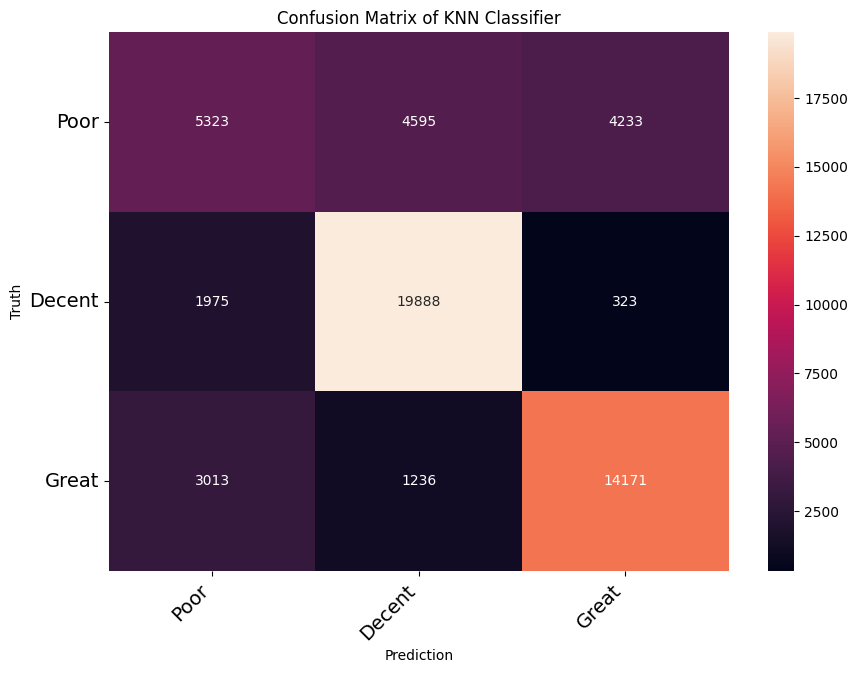

In [47]:
#confusion matrix for KNN classifier
cm = confusion_matrix(y_test_categorical, y_pred_knn_categorical)
print_confusion_matrix("KNN Classifier",cm,["Poor", "Decent", "Great"])

## Evaluating The Models

In [48]:
accuracy = [accuracy_dt,accuracy_rf,accuracy_lgr,accuracy_nb,accuracy_knn]

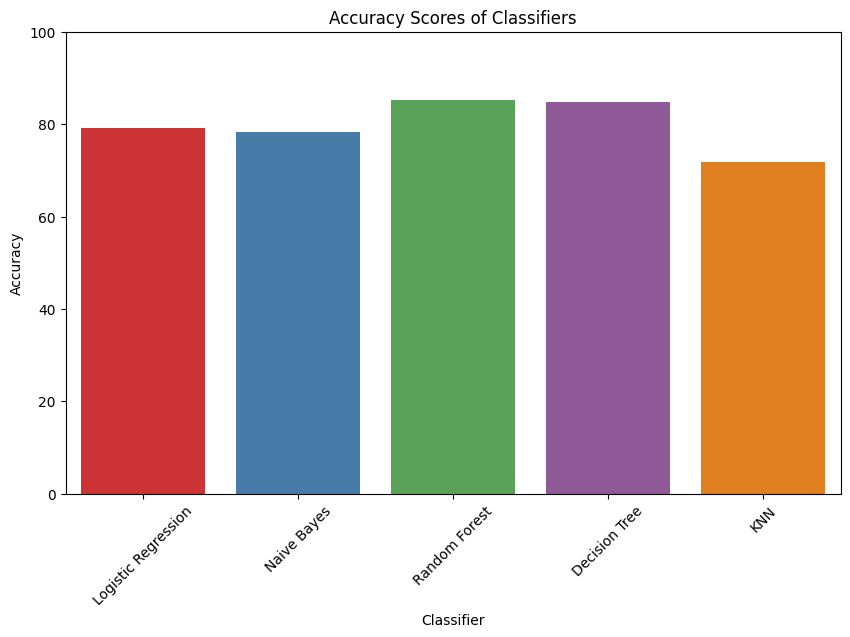

In [49]:
# Assuming you have a list of classifier names and their corresponding accuracy scores
classifier_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'KNN']
accuracy_scores =[i*100 for i in [accuracy_lgr, accuracy_nb, accuracy_rf, accuracy_dt, accuracy_knn]]  # Example accuracy scores

# Create a DataFrame to store classifier names and accuracy scores
accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracy_scores})

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')
plt.title('Accuracy Scores of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Classification report for Decison Tree Classifier
              precision    recall  f1-score   support

      Decent       0.93      0.49      0.64     14151
       Great       0.80      0.99      0.89     22186
        Poor       0.88      0.94      0.91     18420

    accuracy                           0.85     54757
   macro avg       0.87      0.81      0.81     54757
weighted avg       0.86      0.85      0.83     54757



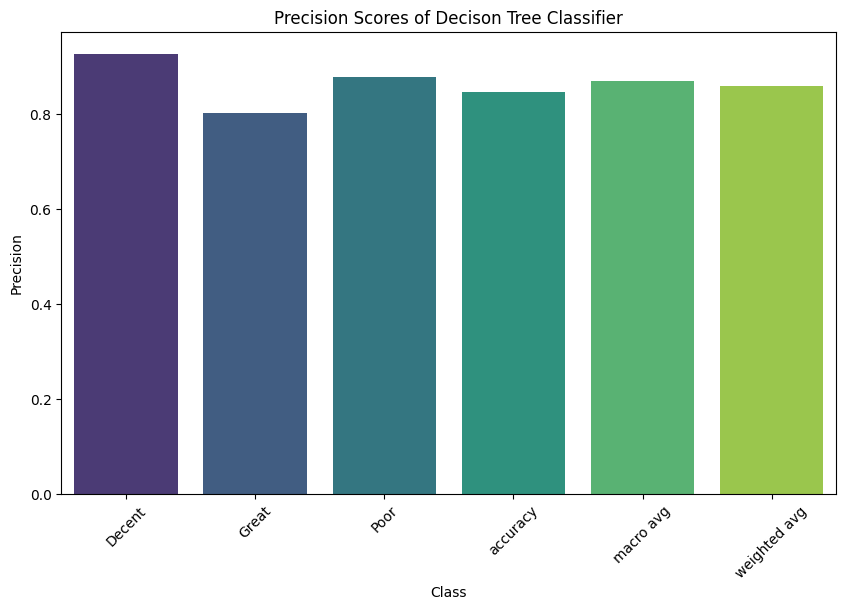

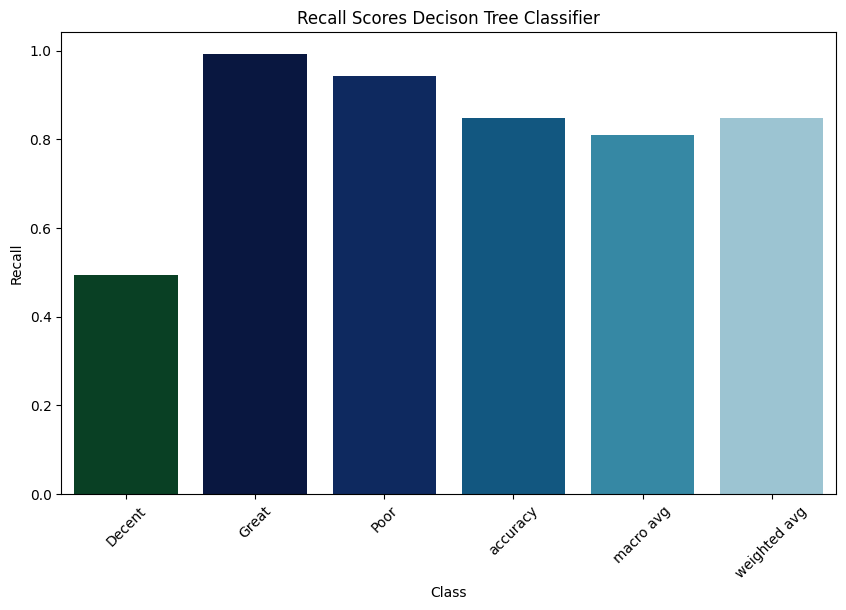

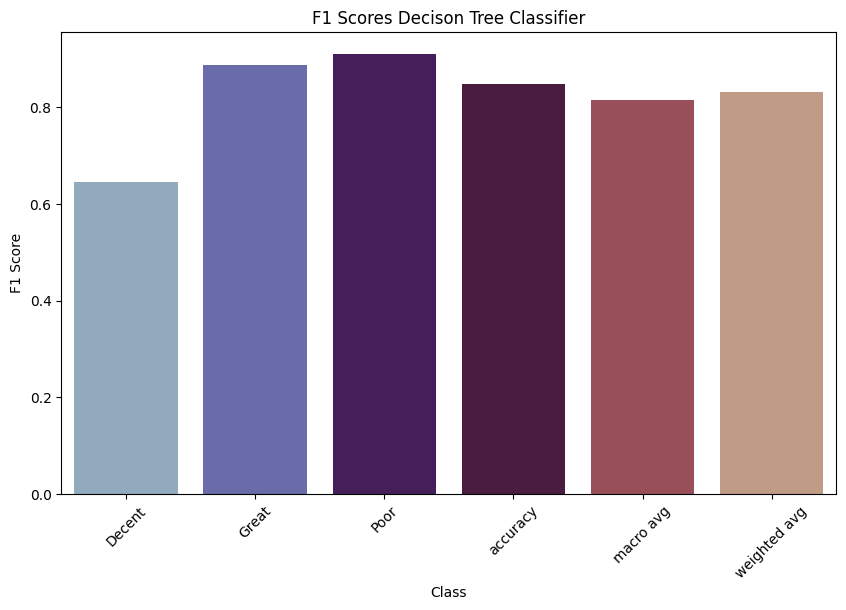

In [50]:
visual_classification_report("Decison Tree Classifier", y_test_categorical, y_pred_dt_categorical )

Classification report for Random Forest Classifier
              precision    recall  f1-score   support

      Decent       0.93      0.49      0.64     14151
       Great       0.80      0.99      0.89     22186
        Poor       0.88      0.94      0.91     18420

    accuracy                           0.85     54757
   macro avg       0.87      0.81      0.81     54757
weighted avg       0.86      0.85      0.83     54757



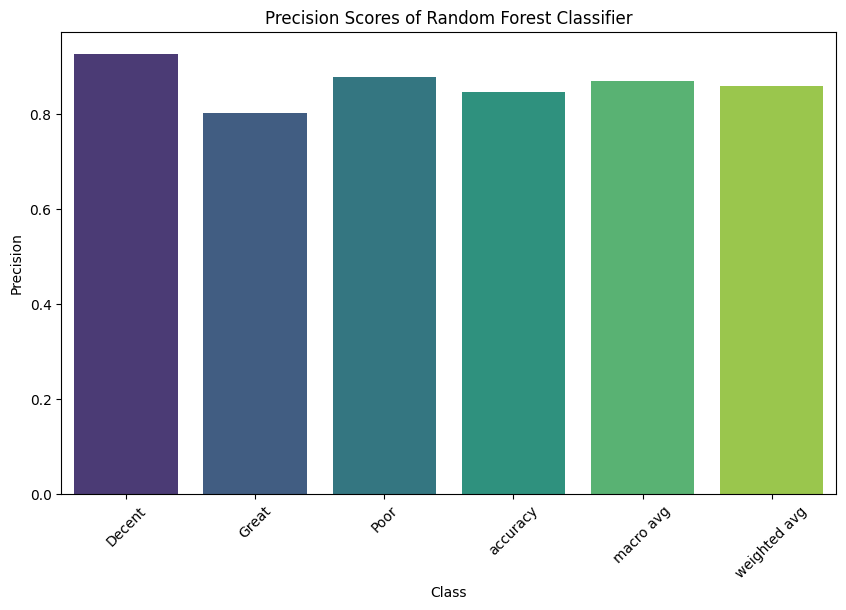

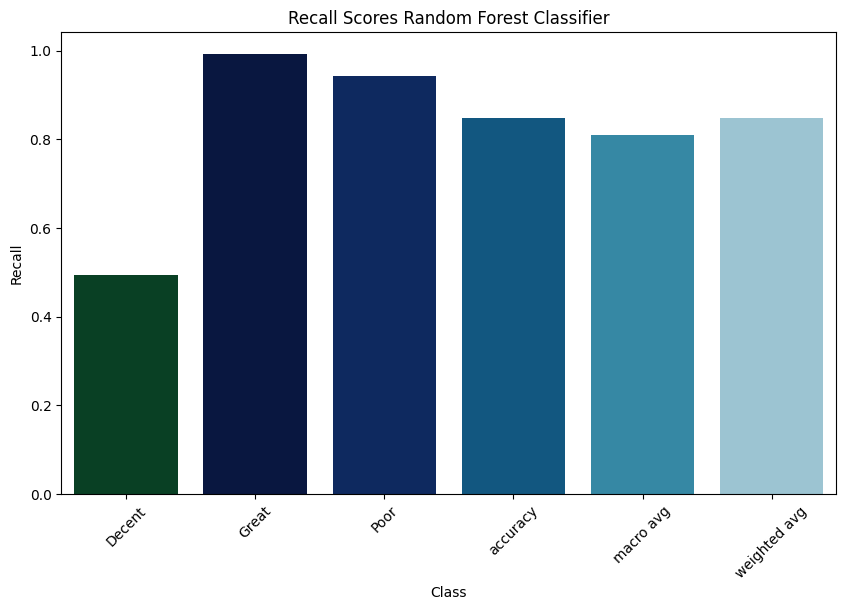

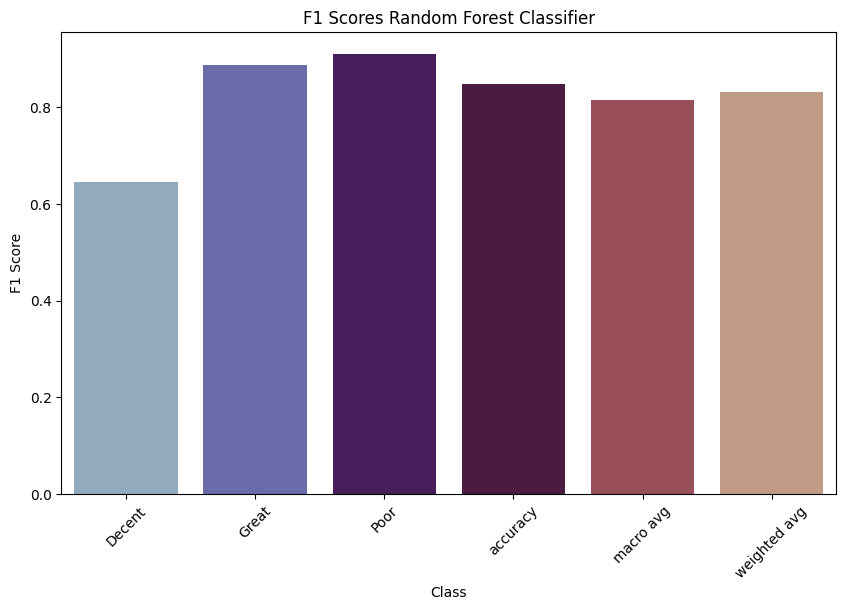

In [51]:
visual_classification_report("Random Forest Classifier", y_test_categorical, y_pred_dt_categorical )

Classification report for Logistic Regression Classifier
              precision    recall  f1-score   support

      Decent       0.70      0.59      0.64     14151
       Great       0.81      0.87      0.84     22186
        Poor       0.83      0.85      0.84     18420

    accuracy                           0.79     54757
   macro avg       0.78      0.77      0.77     54757
weighted avg       0.79      0.79      0.79     54757



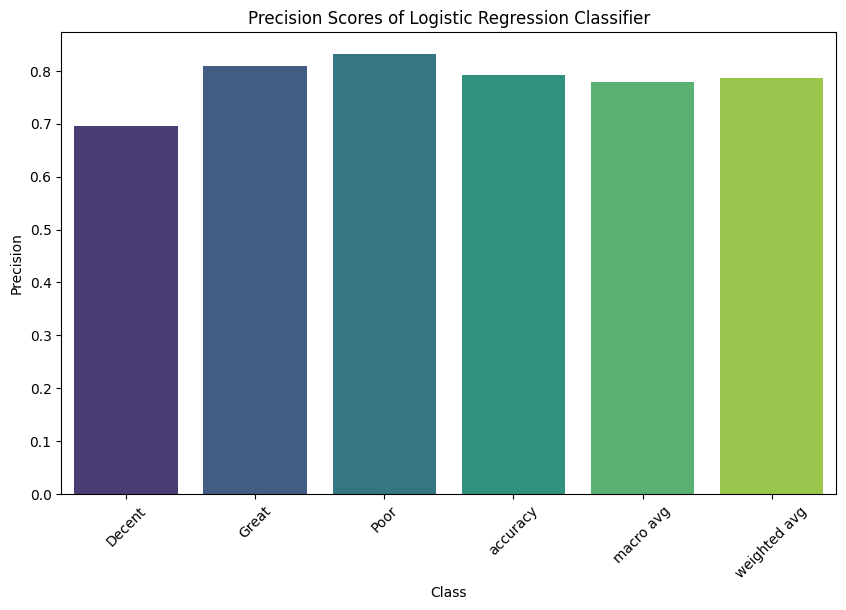

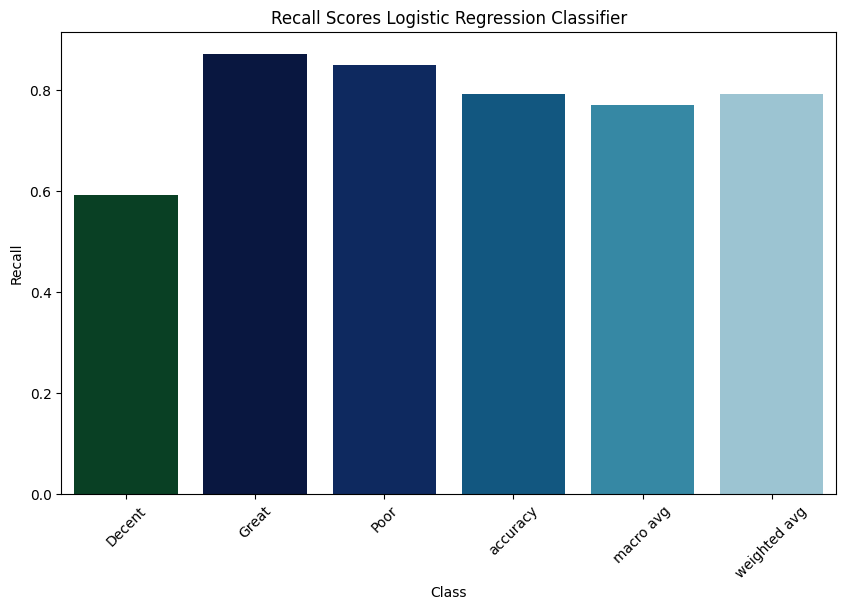

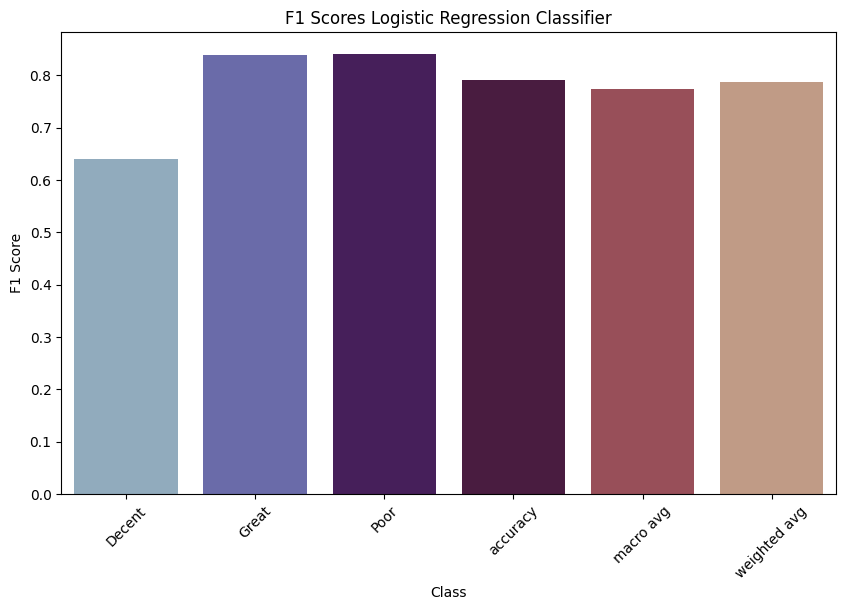

In [53]:
visual_classification_report("Logistic Regression Classifier", y_test_categorical, y_pred_lgr_categorical )

Classification report for Naive Bayes Classifier
              precision    recall  f1-score   support

      Decent       0.62      0.68      0.65     14151
       Great       0.80      0.89      0.84     22186
        Poor       0.93      0.74      0.82     18420

    accuracy                           0.78     54757
   macro avg       0.78      0.77      0.77     54757
weighted avg       0.80      0.78      0.79     54757



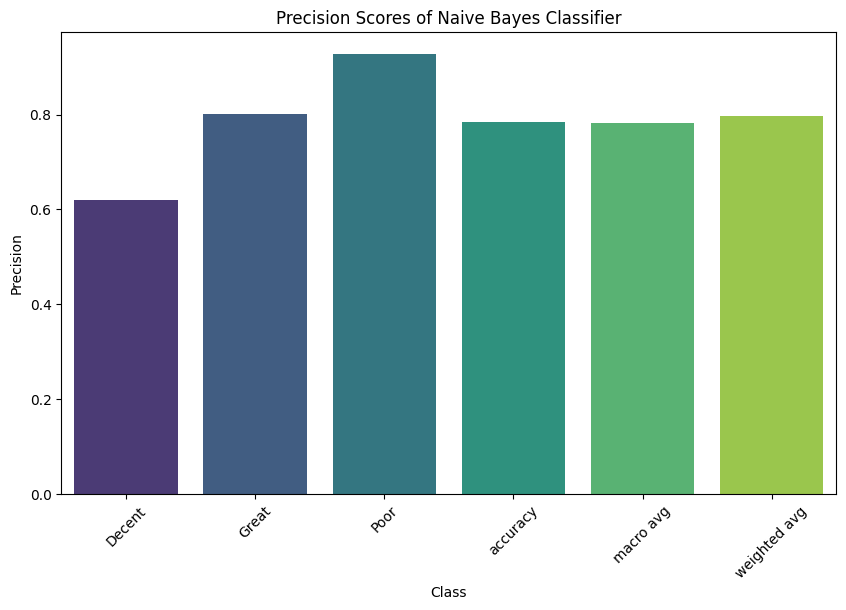

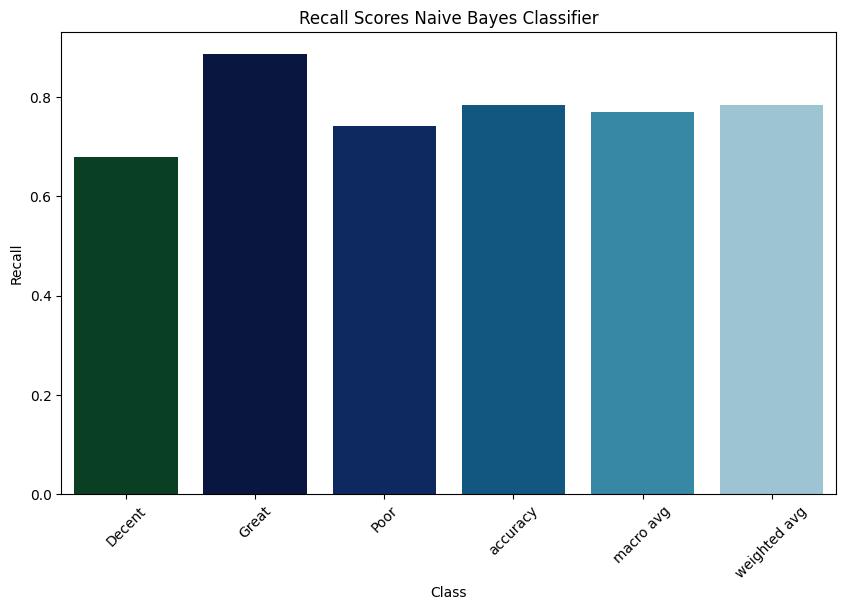

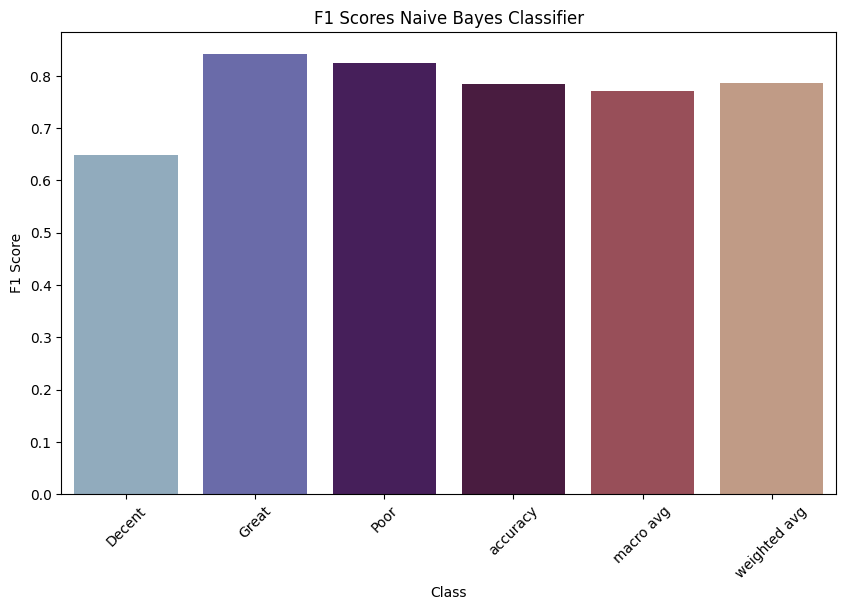

In [54]:
visual_classification_report("Naive Bayes Classifier", y_test_categorical, y_pred_nb_categorical )

Classification report for KNN Classifier
              precision    recall  f1-score   support

      Decent       0.52      0.38      0.44     14151
       Great       0.77      0.90      0.83     22186
        Poor       0.76      0.77      0.76     18420

    accuracy                           0.72     54757
   macro avg       0.68      0.68      0.68     54757
weighted avg       0.70      0.72      0.71     54757



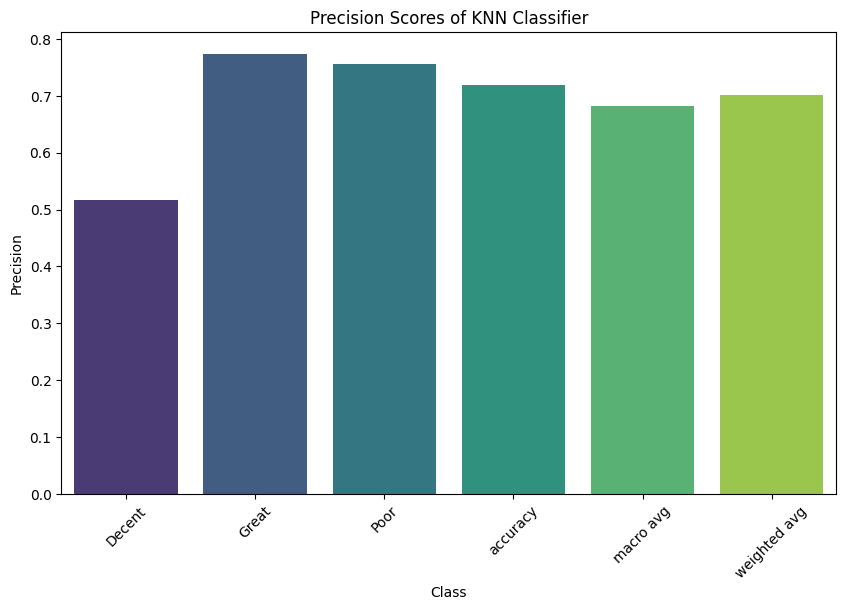

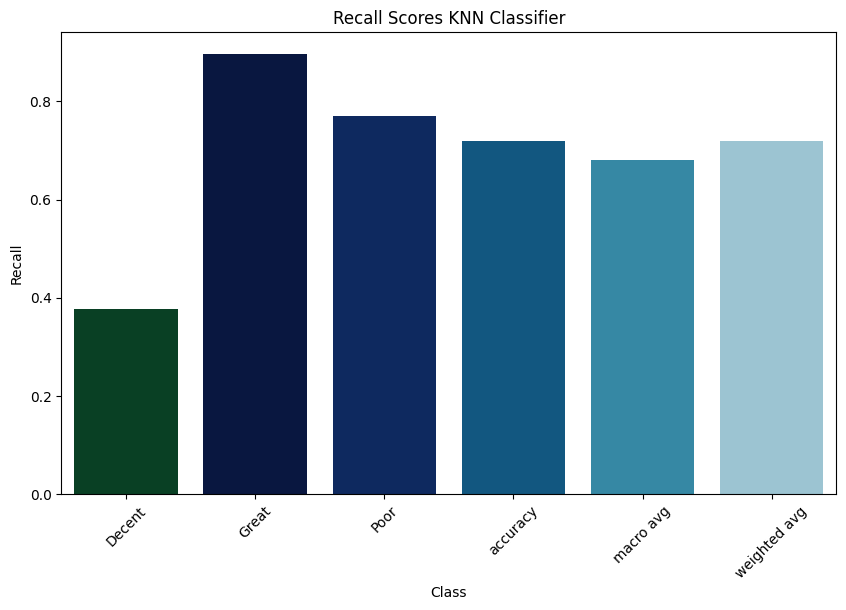

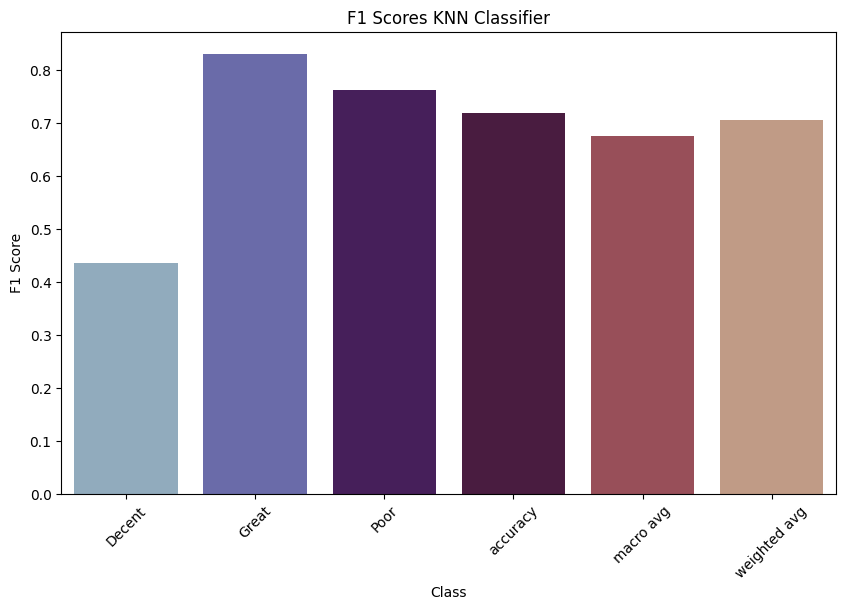

In [55]:
visual_classification_report("KNN Classifier", y_test_categorical, y_pred_knn_categorical )